# AUC-Area Under Curve

# ROC-Receiver Operating Characteristics

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [118]:
data=load_breast_cancer()

In [119]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [120]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [121]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [122]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [123]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [124]:
data.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

In [125]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [126]:
cancer_data=pd.DataFrame(data.data)

In [127]:
cancer_data

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [128]:
cancer_target=pd.DataFrame(data.target)

In [129]:
cancer_target

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [130]:
x=cancer_data

In [131]:
x.shape

(569, 30)

In [132]:
y=cancer_target

In [133]:
y.shape

(569, 1)

In [134]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [135]:
x_train.shape

(443, 30)

In [136]:
x_test.shape

(126, 30)

In [137]:
y_train.shape

(443, 1)

In [138]:
y_test.shape

(126, 1)

In [139]:
lg=LogisticRegression()

In [140]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [141]:
pred=lg.predict(x_test)
print(pred)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0]


In [142]:
print("Accuracy Score:", accuracy_score(y_test,pred))

Accuracy Score: 0.9682539682539683


In [143]:
print("Confusion Matrix:\n", confusion_matrix(y_test,pred))

Confusion Matrix:
 [[44  3]
 [ 1 78]]


In [144]:
print("Classification report:\n", classification_report(y_test,pred))

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        47
           1       0.96      0.99      0.97        79

    accuracy                           0.97       126
   macro avg       0.97      0.96      0.97       126
weighted avg       0.97      0.97      0.97       126



# AUC-ROC Curve

In [145]:
from sklearn.metrics import roc_curve, roc_auc_score

In [146]:
y_pred_prob=lg.predict_proba(x_test)[:,1]

In [147]:
y_pred_prob

array([8.84754871e-01, 1.01965455e-09, 4.12849840e-03, 9.97694381e-01,
       9.99162299e-01, 1.04102762e-10, 1.13314571e-13, 3.27143334e-03,
       9.97621464e-01, 9.85810547e-01, 9.50992957e-01, 1.64458522e-04,
       9.87803443e-01, 4.06869664e-01, 9.97095349e-01, 4.09766752e-04,
       9.97138055e-01, 9.99793440e-01, 9.96227007e-01, 9.75858496e-08,
       8.72184584e-01, 9.71605091e-01, 1.42101234e-09, 9.94912652e-01,
       9.89952111e-01, 9.99567065e-01, 9.97582338e-01, 9.95594405e-01,
       9.94212112e-01, 2.58156048e-08, 9.96814492e-01, 9.98535112e-01,
       9.73591756e-01, 9.88913031e-01, 9.98628654e-01, 9.97358988e-01,
       1.25293241e-03, 9.87153006e-01, 1.65242998e-06, 9.03251843e-01,
       9.98409641e-01, 7.70465421e-04, 9.99466917e-01, 9.92069047e-01,
       9.98099325e-01, 9.59837299e-01, 9.98919734e-01, 9.83350331e-01,
       9.37387550e-01, 9.96924552e-01, 6.48163200e-05, 4.27349172e-10,
       9.64590314e-01, 9.97968237e-01, 9.99419597e-01, 9.85389364e-01,
      

In [148]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [149]:
fpr

array([0.        , 0.        , 0.        , 0.04255319, 0.04255319,
       0.06382979, 0.06382979, 0.10638298, 0.10638298, 1.        ])

In [150]:
tpr

array([0.        , 0.01265823, 0.93670886, 0.93670886, 0.97468354,
       0.97468354, 0.98734177, 0.98734177, 1.        , 1.        ])

In [151]:
thresholds

array([1.99988894e+00, 9.99888936e-01, 8.84754871e-01, 8.53359979e-01,
       7.22251887e-01, 6.69768650e-01, 5.64571657e-01, 3.76044218e-01,
       1.48658500e-01, 2.02648269e-28])

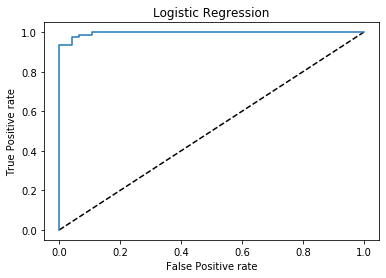

In [152]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Logistic Regression')
plt.show()

In [153]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))

In [154]:
auc_score

0.9617559924589281

In [155]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
ac=accuracy_score(y_test,pred)

In [156]:
print(ac)

0.9523809523809523


In [157]:
round(ac,3)

0.952

# Decision Tree Curve

Accuracy Score: 0.9490977646108268


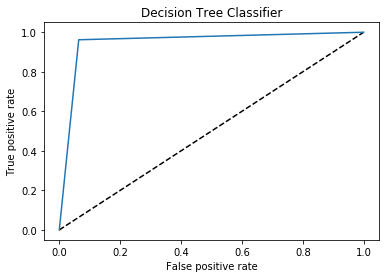

In [158]:
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Decision Tree Classifier")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("Decision Tree Classifier")
accuracy_score=roc_auc_score(y_test,y_pred_prob)
print("Accuracy Score:",accuracy_score)

# Testing various model in One function

In [159]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

lg=LogisticRegression()
gb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()

model=[lg,gb,svc,dtc]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred=m.predict(x_test)
    print("Accuracy Score of", m, "is")
    print("Accuracy Score:",accuracy_score(y_test,pred))
    print("Confusion Matrix:\n",confusion_matrix(y_test,pred))
    print("Classification Report:",classification_report(y_test,pred))
    print('\n')


Accuracy Score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is
Accuracy Score: 0.9682539682539683
Confusion Matrix:
 [[44  3]
 [ 1 78]]
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.94      0.96        47
           1       0.96      0.99      0.97        79

    accuracy                           0.97       126
   macro avg       0.97      0.96      0.97       126
weighted avg       0.97      0.97      0.97       126



Accuracy Score of GaussianNB(priors=None, var_smoothing=1e-09) is
Accuracy Score: 0.9603174603174603
Confusion Matrix:
 [[44  3]
 [ 2 77]]
Classification Report:               precision    recall  f1-score   support

           